<a href="https://colab.research.google.com/github/skssushil/CS208/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded =files.upload()

Saving AMZN-DUK-KO.csv to AMZN-DUK-KO.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AMZN-DUK-KO.csv']))
print(data.head(2))
print("The shape of sample data = ", data.shape)

         Date       AMZN        DUK         KO
0  03-01-2007  38.700001  34.971017  17.874906
1  04-01-2007  38.900002  35.044103  17.882263
The shape of sample data =  (2519, 4)


In [ ]:
Date = data['Date']
# Droping date parameter
f_data = data.drop("Date",axis=1)
print(f_data.head(2))
print(f_data.shape)

        AMZN        DUK         KO
0  38.700001  34.971017  17.874906
1  38.900002  35.044103  17.882263
(2519, 3)


In [ ]:
# standrizing the data
import numpy
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(f_data)
print(standardized_data.shape)

(2519, 3)


In [ ]:
U, s, V = np.linalg.svd(standardized_data)
print(U.shape,s.shape,V.shape)

(2519, 2519) (3,) (3, 3)


In [ ]:
from sklearn.decomposition import TruncatedSVD
# calculating svd to reduduced the features to 2
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(standardized_data)
print(X_reduced.shape)
print(X_reduced)

(2519, 2)
[[-2.0245399   0.05617781]
 [-2.02075254  0.05488667]
 [-2.06074976  0.07821389]
 ...
 [ 3.21987677  0.87717937]
 [ 3.15228899  0.83042876]
 [ 3.19048899  0.82660907]]


In [ ]:
# creating a new data frame for ploting 
dataframe=pd.DataFrame(X_reduced,columns=['1st','2nd'])
print(dataframe)

           1st       2nd
0    -2.024540  0.056178
1    -2.020753  0.054887
2    -2.060750  0.078214
3    -2.053261  0.067575
4    -2.057544  0.071927
...        ...       ...
2514  3.218466  0.915305
2515  3.188888  0.939927
2516  3.219877  0.877179
2517  3.152289  0.830429
2518  3.190489  0.826609

[2519 rows x 2 columns]


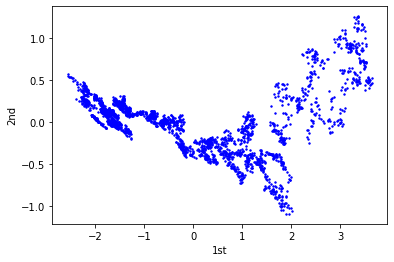

In [ ]:
import matplotlib.pyplot as plt
# ploting the features parameters
ax1 = dataframe.plot.scatter(x='1st',y='2nd',s=2,c='blue')
plt.show()